In [1]:
from pylab import *

In [154]:
def Pot_ini(x,y,V0=1):
    # x -> i , y -> j
    N_x , N_y = len(x) , len(y)
    M = zeros((N_y,N_x))
    for i in range(1,N_x-1):
        for j in range(1,N_y-1):
            if 0.375<=x[i]<=0.625 and 0.375<=y[j]<=0.625:
                M[j,i] = V0
            else:
                M[j,i] = 0.5*V0
    return M

def Relajar(M,x,y):
    N_y,N_x = M.shape
    for i in range(1,N_x-1):
        for j in range(1,N_y-1):
            if 0.375<=x[i]<=0.625 and 0.375<=y[j]<=0.625:
                continue
            else:
                M[j,i] = 0.25*(M[j,i+1]+M[j,i-1]+M[j+1,i]+M[j-1,i])
    return M

def Jacobi(M,x,y,err=1e-4):
    M_ref = copy(M)
    contador , d_max = 0 , 1
    while d_max > err:
        M_ref = copy(M)
        for i in range(10):
             M = Relajar(M,x,y)
        difer = abs(M_ref-M)
        d_max = difer.max()
        contador += 10
    print('Solucion con ',contador,' iteraciones')
    return M 

In [155]:
x = arange(0,1.01,0.01)
y = arange(0,2.01,0.01)
XX,YY = meshgrid(x,y)
V_ini = Pot_ini(x,y)

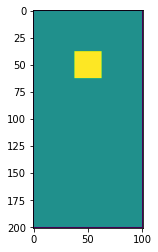

In [156]:
imshow(V_ini)
show()

Solucion con  5150  iteraciones


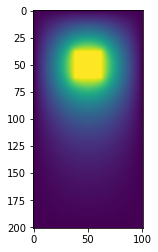

In [157]:
V_it = Jacobi(V_ini,x,y)
imshow(V_it)
#contourf(XX,YY,V_it)
#gca().set_aspect('equal')
show()

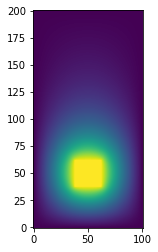

In [159]:
imshow(V_it,origin='lower')

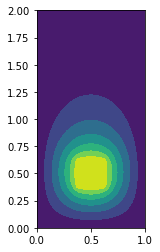

In [158]:
contourf(XX,YY,V_it)
gca().set_aspect('equal')
show()